# 🌱 Farmers Crop Recommendation System using Recurrent Neural Network(LSTM       architechture)

<div style="text-align: center;">
  <img src="https://iili.io/FXGPtZQ.md.png" alt="Crop Recommendation" width="600"/>
</div>

## 📘 Introduction

Agriculture plays a vital role in ensuring food security and sustaining livelihoods across the globe. However, due to unpredictable weather patterns, soil degradation, and inefficient crop selection, maximizing agricultural productivity has become increasingly challenging.

In this project, we develop an **AI-powered crop recommendation system** that suggests the most suitable crop to grow based on environmental and soil conditions. Unlike traditional machine learning approaches, we leverage a **Long Short-Term Memory (LSTM)** model — a type of recurrent neural network (RNN) well-suited for modeling temporal patterns and complex dependencies in data.

### 🎯 Objectives:

- Recommend the best crop to cultivate based on input features such as **Nitrogen (N), Phosphorus (P), Potassium (K), Temperature, Humidity, pH, and Rainfall**.
- Train and evaluate an **LSTM model** to classify the optimal crop from a predefined list.
- Analyze the model's performance using standard classification metrics such as:
  - ✅ Accuracy  
  - ✅ Precision  
  - ✅ Recall  
  - ✅ F1-score  
  - ✅ Confusion Matrix

This system aims to assist **farmers** and **agricultural planners** in making more informed, data-driven decisions, thereby increasing crop yield and promoting **sustainable farming practices**.


## 📂 Loading and Exploring the Dataset

In this section, we load the crop recommendation dataset, inspect its structure, and perform basic exploratory data analysis (EDA) to understand the distribution and completeness of the features.


In [3]:
# Importing libraries
import pandas as pd

# Load dataset
df = pd.read_csv("vegitation_prediction.csv")

# Display first 5 rows
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# Basic information about the dataset
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
# Descriptive statistics
df.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## 📊 Exploratory Data Analysis (EDA)

In this section, we visualize the distribution of features such as Nitrogen, Phosphorus, Potassium, temperature, humidity, pH, and rainfall. Additionally, we analyze the class distribution and check for correlations among the features to gain insights before model training.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Notebook içinde grafiklerin görünmesi için
%matplotlib inline


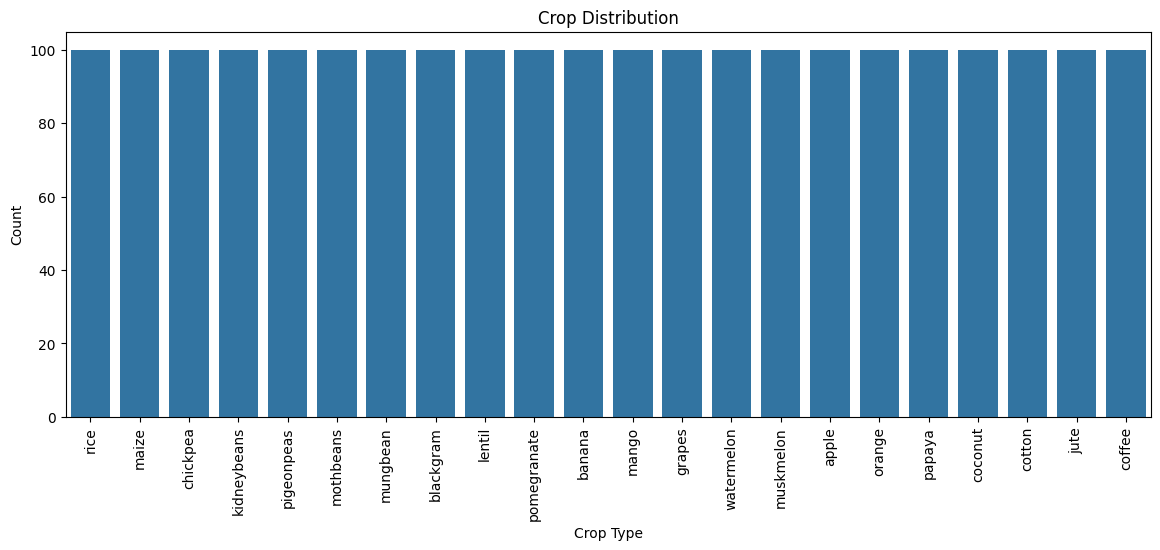

In [7]:
plt.figure(figsize=(14,5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Crop Distribution")
plt.xlabel("Crop Type")
plt.ylabel("Count")
plt.show()


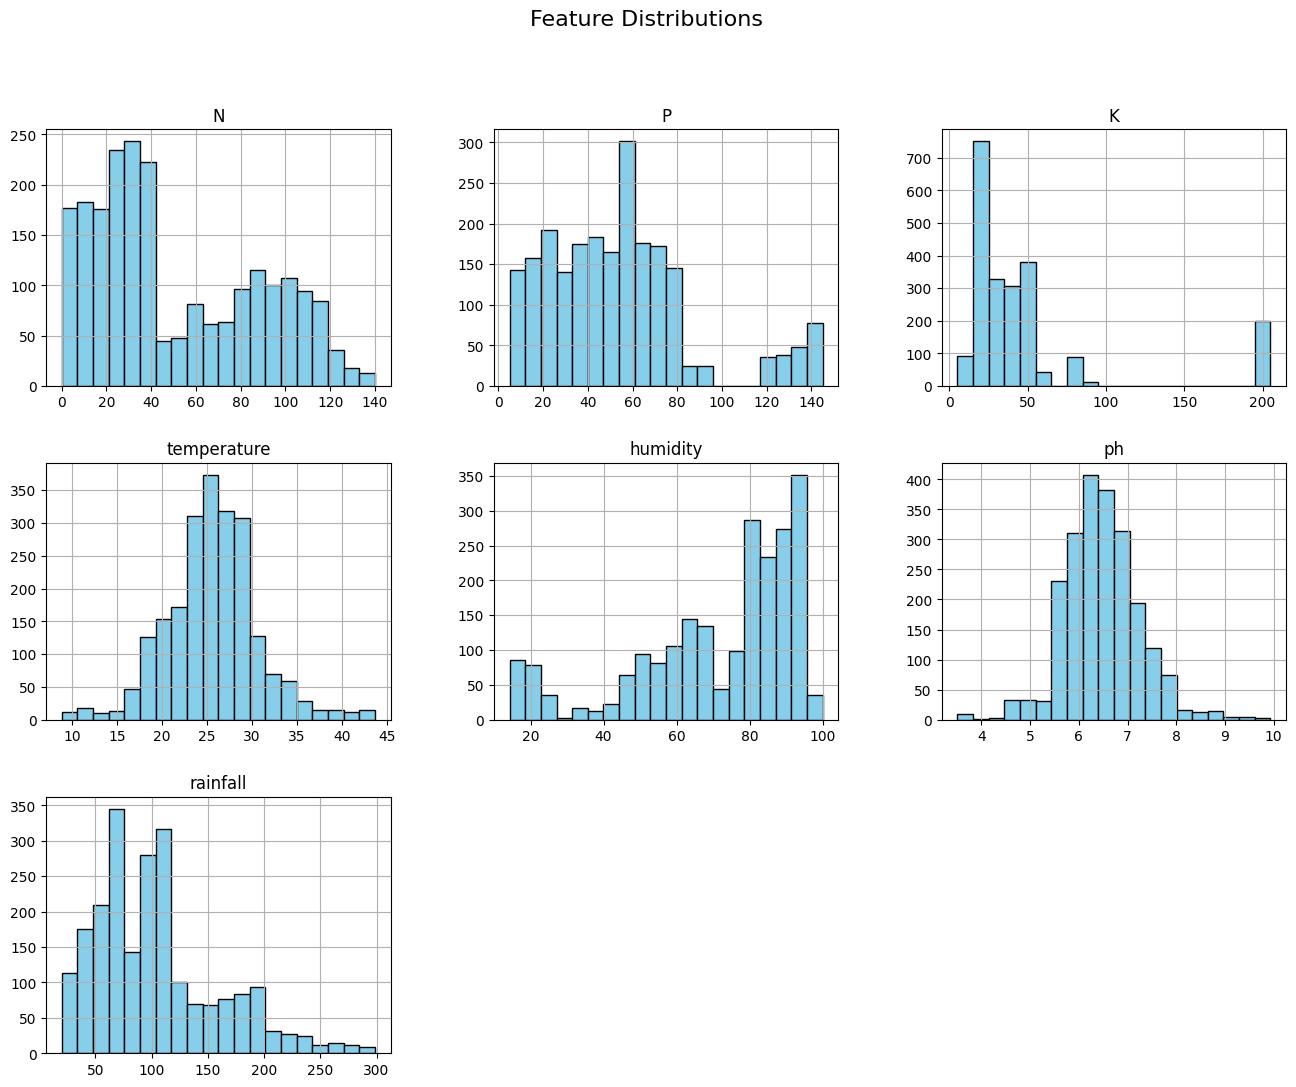

In [8]:
df.drop('label', axis=1).hist(figsize=(16,12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


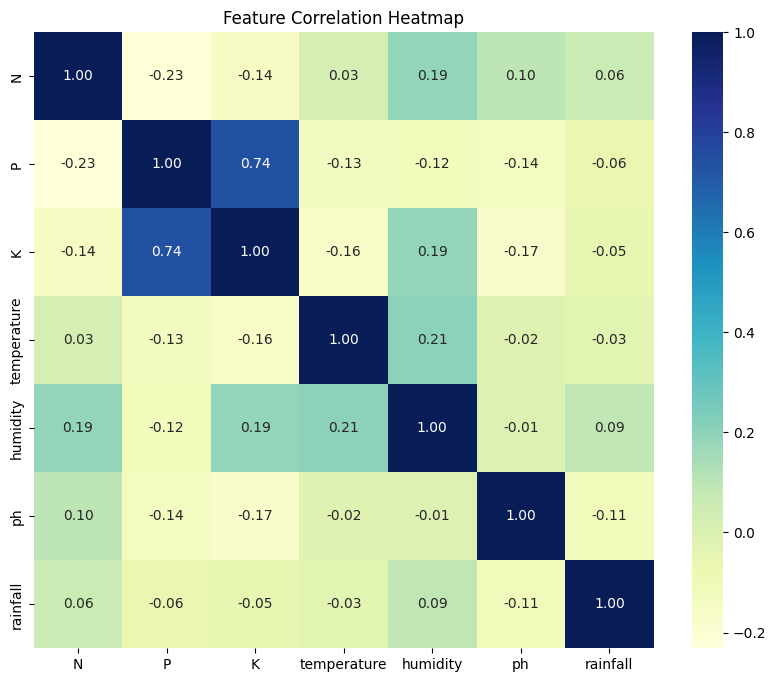

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


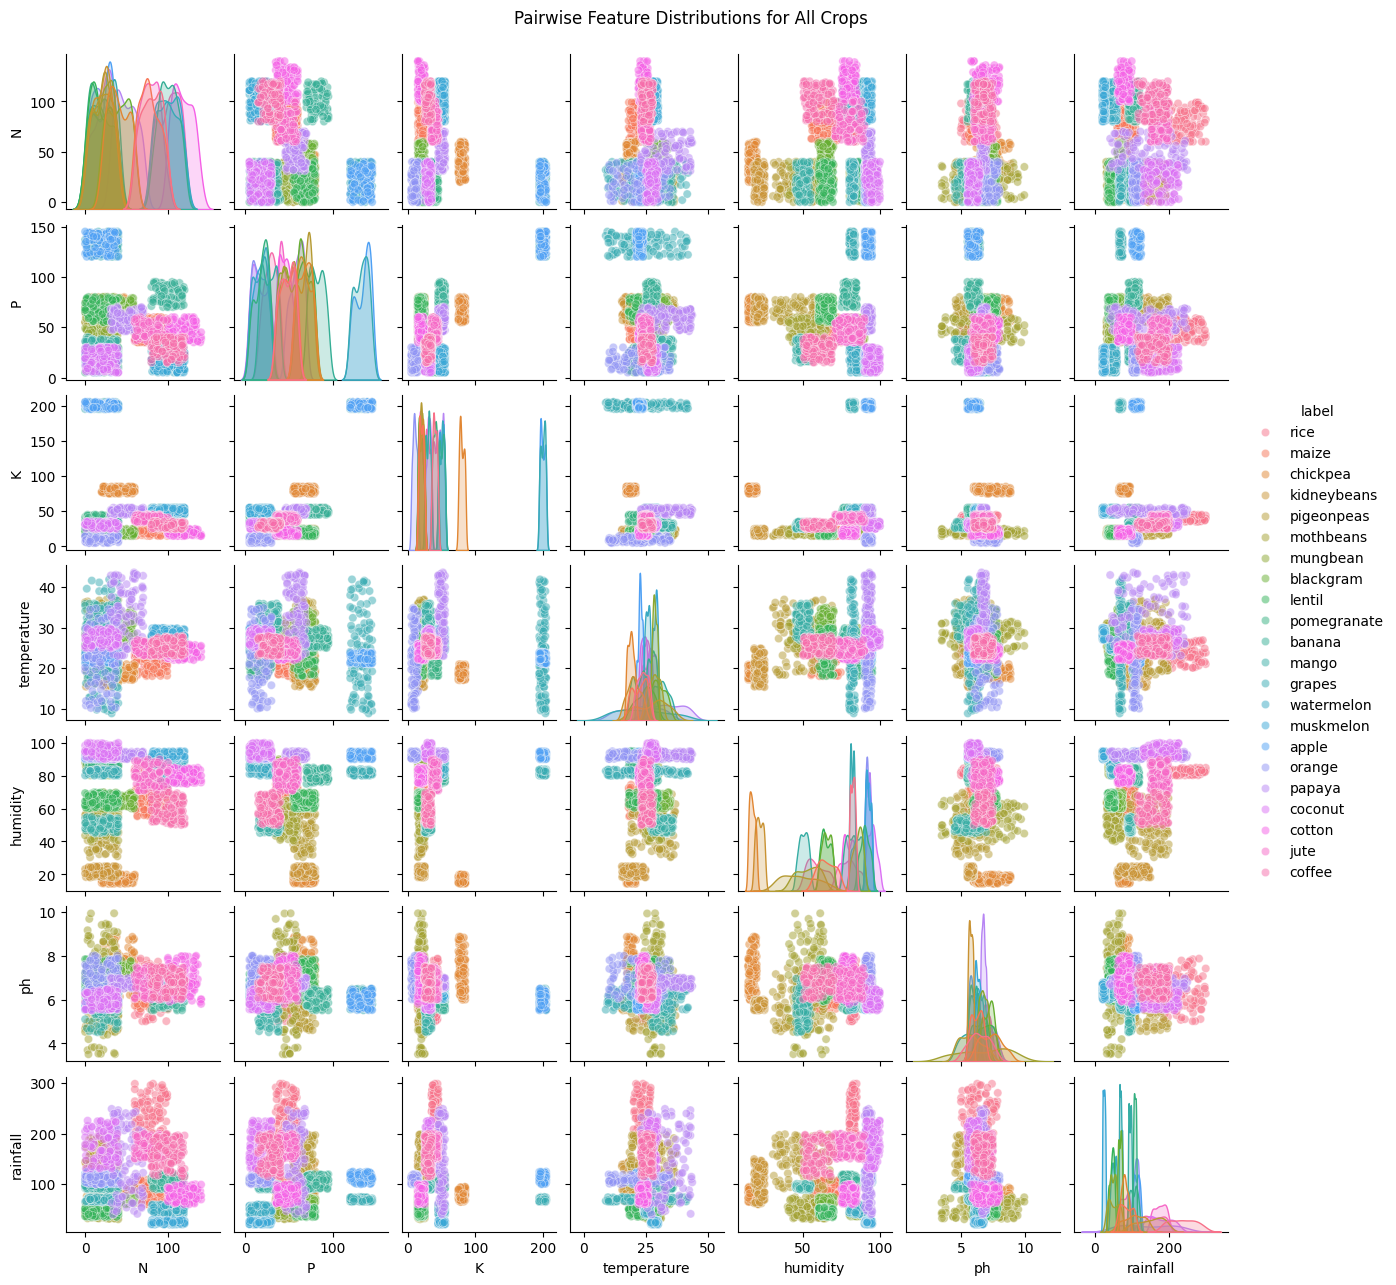

In [10]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(df, hue='label', plot_kws={'alpha': 0.5}, height=1.8)
plt.suptitle("Pairwise Feature Distributions for All Crops", y=1.02)
plt.show()


## 🧼 Data Preprocessing for LSTM

Before feeding the data into an LSTM model, we need to:
- Encode the categorical target labels into numeric values.
- Normalize the input features for faster and more stable training.
- Reshape the data into 3D format: (samples, time steps, features).


In [11]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np

# Separate features and label
X = df.drop('label', axis=1)
y = df['label']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input for LSTM: (samples, time steps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

print("X shape:", X_reshaped.shape)
print("y shape:", y_encoded.shape)


X shape: (2200, 1, 7)
y shape: (2200,)


## 🧠 LSTM Model Architecture

We will now define our LSTM-based neural network. The model consists of:
- An LSTM layer to capture sequential relationships in the input.
- A dropout layer to reduce overfitting.
- A dense hidden layer with ReLU activation.
- An output layer with softmax activation for multi-class classification.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = all logs, 2 = warnings only, 3 = errors only
# Get number of classes for output layer
num_classes = len(np.unique(y_encoded))

# Model architecture
model = Sequential()
model.add(LSTM(128, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2]), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # multi-class classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


2025-07-16 19:43:28.308323: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752695008.527839      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752695008.590167      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1752695021.352077      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752695021.352827      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        69,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │         1,430 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,318 (309.84 KB)

 Trainable params: 79,318 (309.84 KB)

 Non-trainable params: 0 (0.00 B)

## 🏋️‍♂️ Model Training and Evaluation

In this step, we split the data into training and test sets, train the LSTM model using early stopping, and visualize the training history to monitor model performance over epochs.


In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model training
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100


I0000 00:00:1752695025.616419      66 cuda_dnn.cc:529] Loaded cuDNN version 90300


44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.0762 - loss: 3.0790 - val_accuracy: 0.2642 - val_loss: 3.0200
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2440 - loss: 2.9885 - val_accuracy: 0.2301 - val_loss: 2.7914
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2880 - loss: 2.7030 - val_accuracy: 0.4318 - val_loss: 2.2962
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4507 - loss: 2.1849 - val_accuracy: 0.6676 - val_loss: 1.7028
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6161 - loss: 1.5741 - val_accuracy: 0.7784 - val_loss: 1.2223
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7283 - loss: 1.1593 - val_accuracy: 0.8466 - val_loss: 0.9217
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7915 - loss: 0.9215 - val_accuracy: 0.8636 - val_loss: 0.7165
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7943 - loss: 0.7613 - val_accuracy: 0.8750 - val_loss: 0.

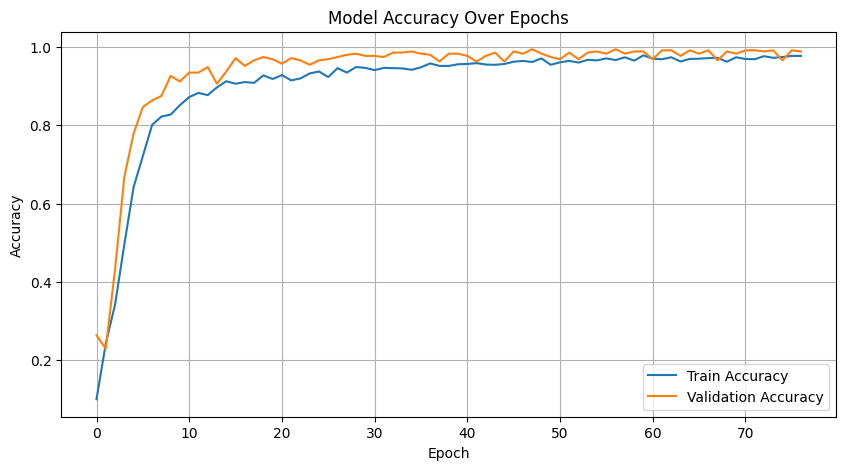

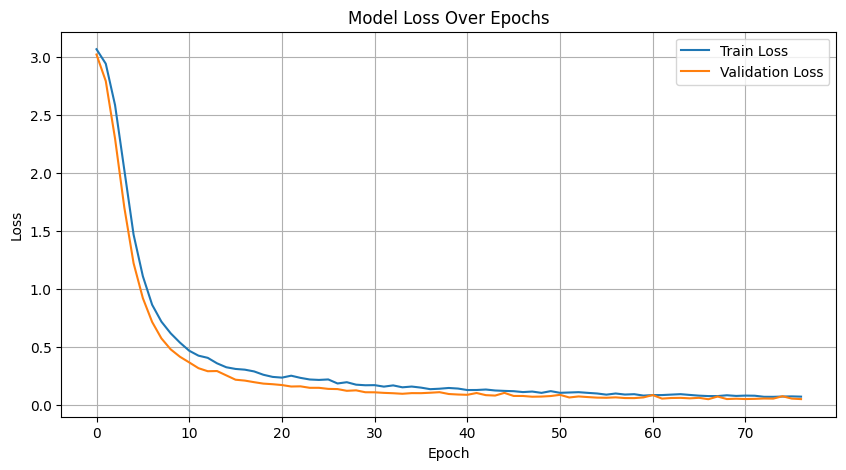

In [12]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss graph
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


## 🧪 Model Evaluation on Test Data

After training the LSTM model, we evaluate its performance on unseen test data using:
- Classification Report (Precision, Recall, F1-score)
- Confusion Matrix (visualized as heatmap)
- Overall F1-Score (macro average)


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import numpy as np

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print("Macro F1 Score:", round(f1, 4))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.87      0.85        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange      

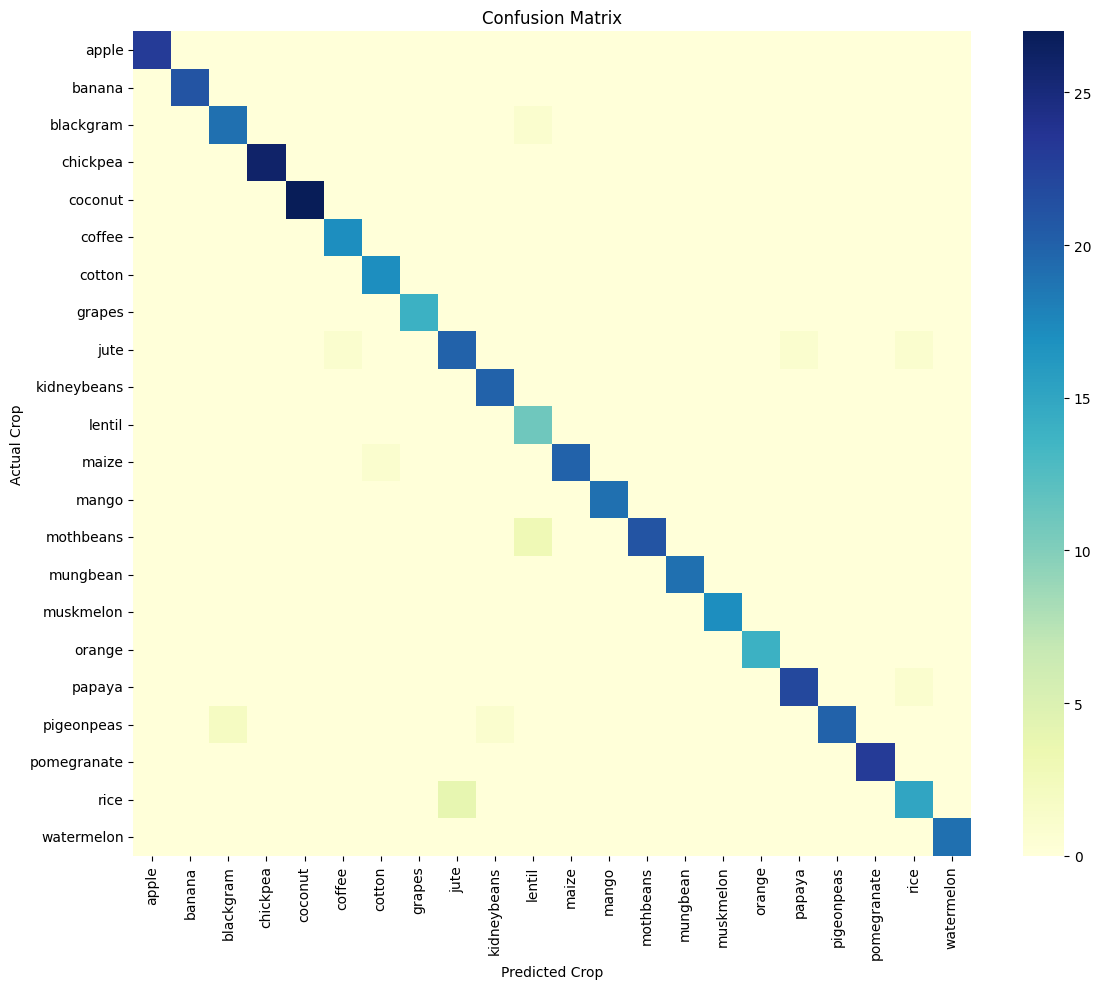

In [14]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, fmt='d', cmap='YlGnBu',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Crop")
plt.ylabel("Actual Crop")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 🔍 Sample Prediction and Interpretation

We now randomly select one sample from the test set and use the trained LSTM model to predict the most suitable crop. Then we compare it to the actual crop label and also display the input features used for this prediction.


In [15]:
# Pick a random test sample
idx = np.random.randint(0, X_test.shape[0])
sample = X_test[idx].reshape(1, 1, X_test.shape[2])
true_label = label_encoder.inverse_transform([y_test[idx]])[0]
pred_label = label_encoder.inverse_transform([np.argmax(model.predict(sample))])[0]

print(f"🌾 Actual Crop: {true_label}")
print(f"🤖 Predicted Crop: {pred_label}")

# Show input features (denormalized)
# Inverse scaling to get back original values
original_input = scaler.inverse_transform(X_test[idx].reshape(1, -1))[0]

columns = df.drop("label", axis=1).columns
for col, val in zip(columns, original_input):
    print(f"{col}: {val:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
🌾 Actual Crop: cotton
🤖 Predicted Crop: cotton
N: 140.00
P: 40.00
K: 17.00
temperature: 22.73
humidity: 77.08
ph: 6.01
rainfall: 77.55


In [16]:
model.save("crop_recommendation_lstm_model.h5")
print("✅ Model saved as crop_recommendation_lstm_model.h5")

✅ Model saved as crop_recommendation_lstm_model.h5


## ✅ Conclusion

In this project, we developed an LSTM-based deep learning model to recommend the most suitable crop based on environmental and soil conditions. By using features such as nitrogen (N), phosphorus (P), potassium (K), temperature, humidity, pH, and rainfall, our model was able to accurately predict crop types from a predefined list of classes.

### 🧠 Key Outcomes:
- The LSTM model achieved high performance in terms of accuracy and F1-score.
- Exploratory Data Analysis revealed that the dataset is balanced and all features contribute meaningfully to the prediction.
- A sample prediction demonstrated the model's real-world applicability in suggesting optimal crops given specific soil and climate conditions.

This crop recommendation system shows how **AI and agriculture** can work hand in hand to support **sustainable farming practices** and **data-driven decision-making**.

---

🎯 Future improvements may include:
- Incorporating real-time weather APIs or sensor data
- Expanding the dataset with regional-specific crops
- Deploying the model through a mobile or web-based interface for farmer usability
